In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'SEK=X'
numbers_in_currency = 'SEK'
share_name = 'BOL.ST'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [4]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2004-03-31,4498,-3838,660,-170,-38,23,-127,348,-41,...,-133,-482,-271,0,0,0,-271,6,-271,245
1,2004-06-30,4547,-3927,620,-185,-47,42,-80,350,-27,...,9,-393,16,0,0,0,16,-3,54,245
2,2004-09-30,4265,-3639,626,-202,-36,17,-90,315,-17,...,-1,-359,-30,0,0,0,-30,-2,-44,245
3,2004-12-31,4618,-3994,624,-172,-48,32,-84,352,-60,...,151,-274,-264,0,0,0,-264,0,-243,245
4,2005-03-31,4458,-3869,589,-185,-39,32,-44,353,-97,...,147,-76,-314,0,0,0,-314,-1,-142,289


## Calculate date when quaterly reports could be available

In [5]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [6]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
75,2022-12-31,2023-02-11,273,23577,-19474,4103,2577,12159,3830,22278,...,3533,96376,10335,0,414,15832,10639,38065,7295,-3724
76,2023-03-31,2023-04-21,273,19962,-15872,4090,2541,13722,3721,25067,...,3517,102257,12361,0,427,17226,12301,41498,2871,-2918
77,2023-06-30,2023-07-21,273,18442,-16823,1619,521,3589,3200,25938,...,3619,97568,11654,0,2598,18891,11165,42376,449,-4219
78,2023-09-30,2023-10-21,273,19396,-16953,2443,1357,4219,3711,24137,...,3587,98032,10714,0,3776,18167,11723,42021,2392,-3590
79,2023-12-31,2024-02-11,273,20754,-18170,2585,1656,4978,3964,21987,...,3537,101957,10915,0,2962,18396,11462,38052,6471,-4804


## Pull historical average USD national currency rates and add to the dataframe

In [7]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
75,2022-12-31,2023-02-11,273,23577,-19474,4103,2577,12159,3830,22278,...,96376,10335,0,414,15832,10639,38065,7295,-3724,10.721097
76,2023-03-31,2023-04-21,273,19962,-15872,4090,2541,13722,3721,25067,...,102257,12361,0,427,17226,12301,41498,2871,-2918,10.432528
77,2023-06-30,2023-07-21,273,18442,-16823,1619,521,3589,3200,25938,...,97568,11654,0,2598,18891,11165,42376,449,-4219,10.518236
78,2023-09-30,2023-10-21,273,19396,-16953,2443,1357,4219,3711,24137,...,98032,10714,0,3776,18167,11723,42021,2392,-3590,10.805716
79,2023-12-31,2024-02-11,273,20754,-18170,2585,1656,4978,3964,21987,...,101957,10915,0,2962,18396,11462,38052,6471,-4804,10.657495


## Convert USD values related to IS, BS, CFS to national currency

In [8]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
75,2022-12-31,2023-02-11,273,23577,-19474,4103,2577,12159,3830,22278,...,96376,10335,0,414,15832,10639,38065,7295,-3724,10.721097
76,2023-03-31,2023-04-21,273,19962,-15872,4090,2541,13722,3721,25067,...,102257,12361,0,427,17226,12301,41498,2871,-2918,10.432528
77,2023-06-30,2023-07-21,273,18442,-16823,1619,521,3589,3200,25938,...,97568,11654,0,2598,18891,11165,42376,449,-4219,10.518236
78,2023-09-30,2023-10-21,273,19396,-16953,2443,1357,4219,3711,24137,...,98032,10714,0,3776,18167,11723,42021,2392,-3590,10.805716
79,2023-12-31,2024-02-11,273,20754,-18170,2585,1656,4978,3964,21987,...,101957,10915,0,2962,18396,11462,38052,6471,-4804,10.657495


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [9]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [10]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [11]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [12]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2004-04-26,15.258005,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,0.355473,0.644527,inf,inf,16.252936,6.461279,0.146732,0.068253,0.057316,0.161239
1,2004-05-03,14.683218,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,0.355473,0.644527,inf,inf,16.252936,6.461279,0.146732,0.068253,0.057316,0.161239
2,2004-05-10,13.220119,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,0.355473,0.644527,inf,inf,16.252936,6.461279,0.146732,0.068253,0.057316,0.161239
3,2004-05-17,14.787728,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,0.355473,0.644527,inf,inf,16.252936,6.461279,0.146732,0.068253,0.057316,0.161239
4,2004-05-24,14.160685,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,0.355473,0.644527,inf,inf,16.252936,6.461279,0.146732,0.068253,0.057316,0.161239


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [13]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2004-04-26,15.258005,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,6.461279,0.146732,0.068253,0.057316,0.161239,3.044146,0.490837,0.207771,0.913751,1.132791
1,2004-05-03,14.683218,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,6.461279,0.146732,0.068253,0.057316,0.161239,2.929469,0.472346,0.199944,0.905924,1.090118
2,2004-05-10,13.220119,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,6.461279,0.146732,0.068253,0.057316,0.161239,2.637564,0.425280,0.180021,0.886001,0.981494
3,2004-05-17,14.787728,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,6.461279,0.146732,0.068253,0.057316,0.161239,2.950320,0.475708,0.201367,0.907347,1.097877
4,2004-05-24,14.160685,2004-03-31,4498.0,5.012245,31.085714,245.0,3300.0,13.469388,1107.0,...,6.461279,0.146732,0.068253,0.057316,0.161239,2.825218,0.455537,0.192828,0.898809,1.051324


# Calculate Dividend yield and currency-share price correlation

In [14]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

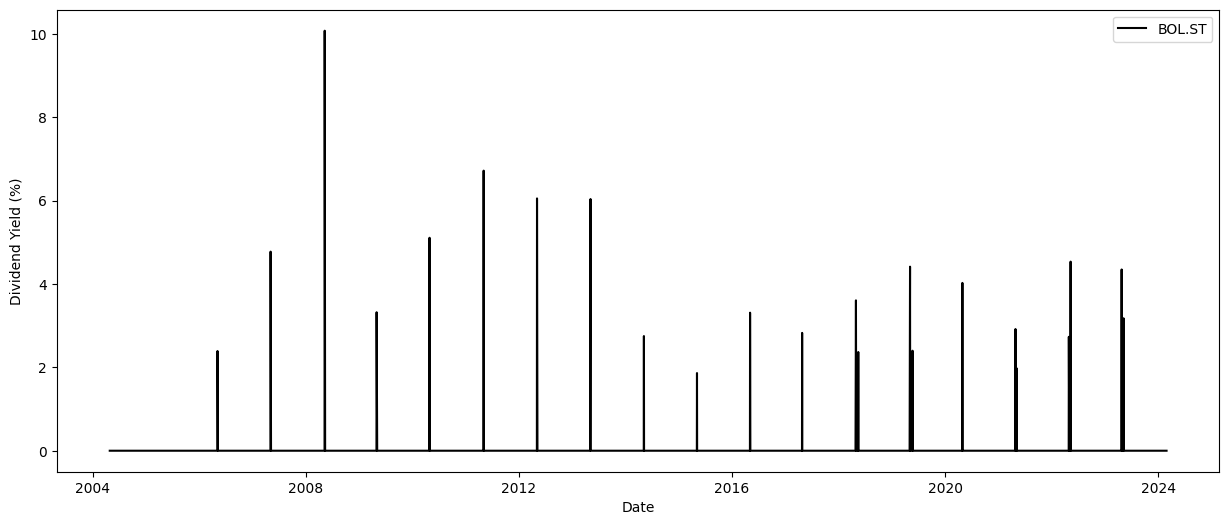

In [15]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.806372
share_price      1.000000
Name: share_price, dtype: float64


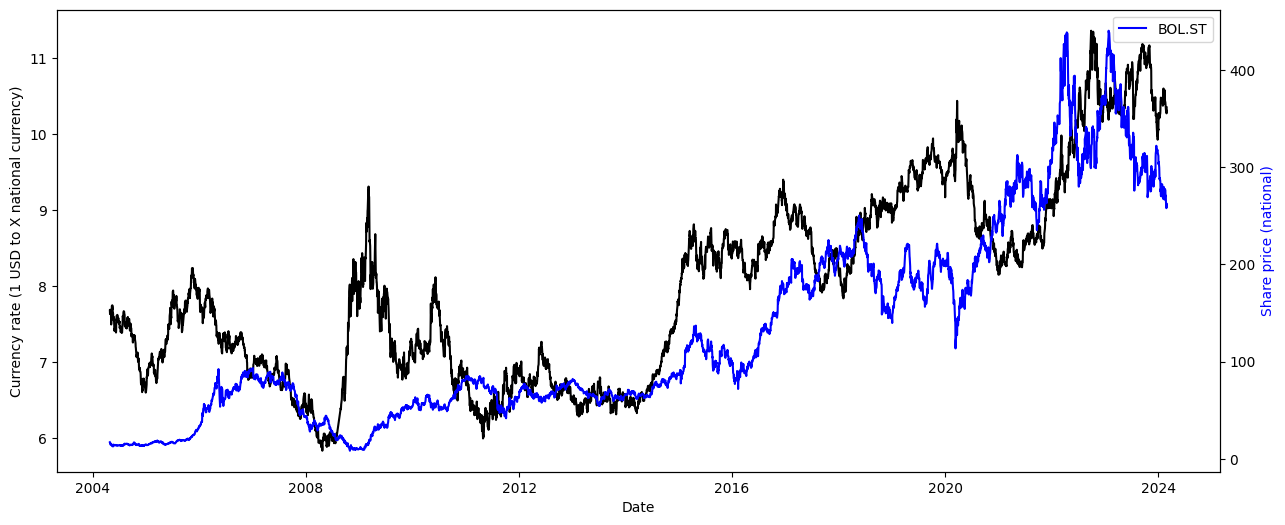

In [16]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

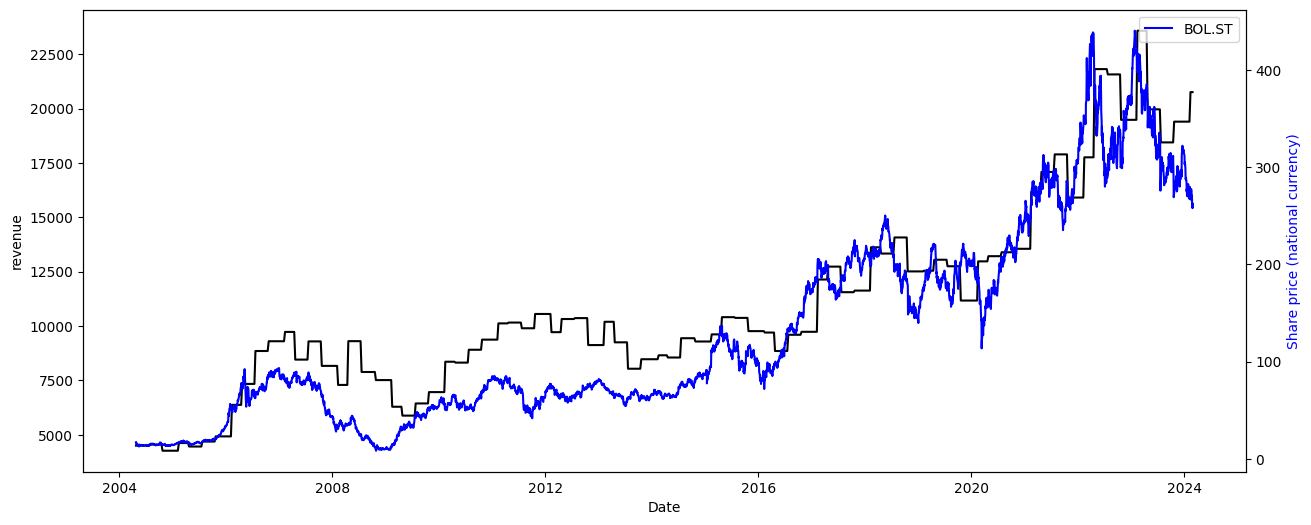

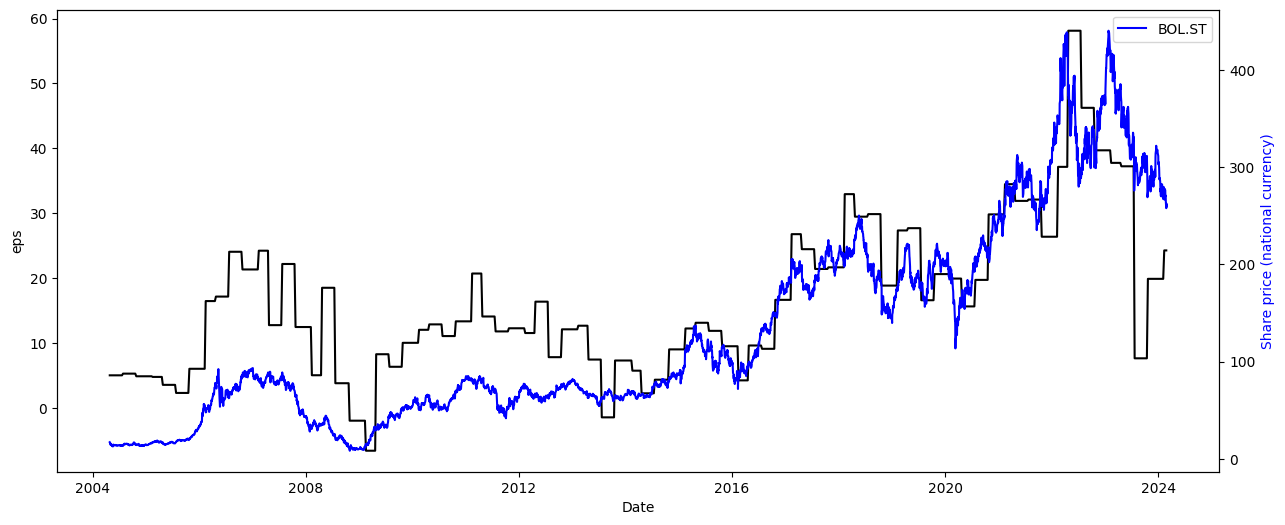

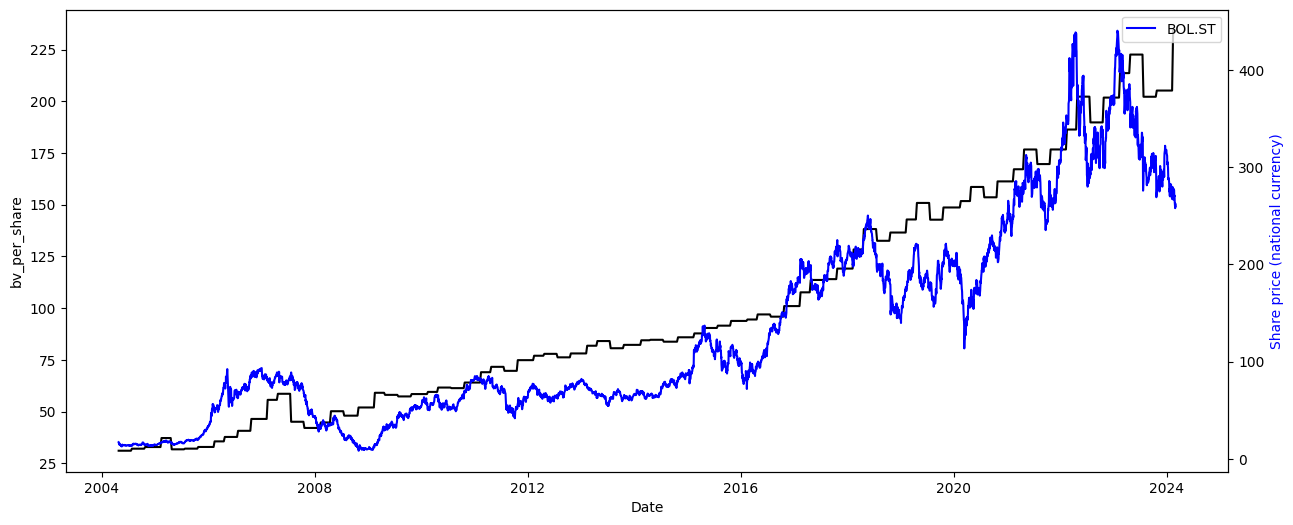

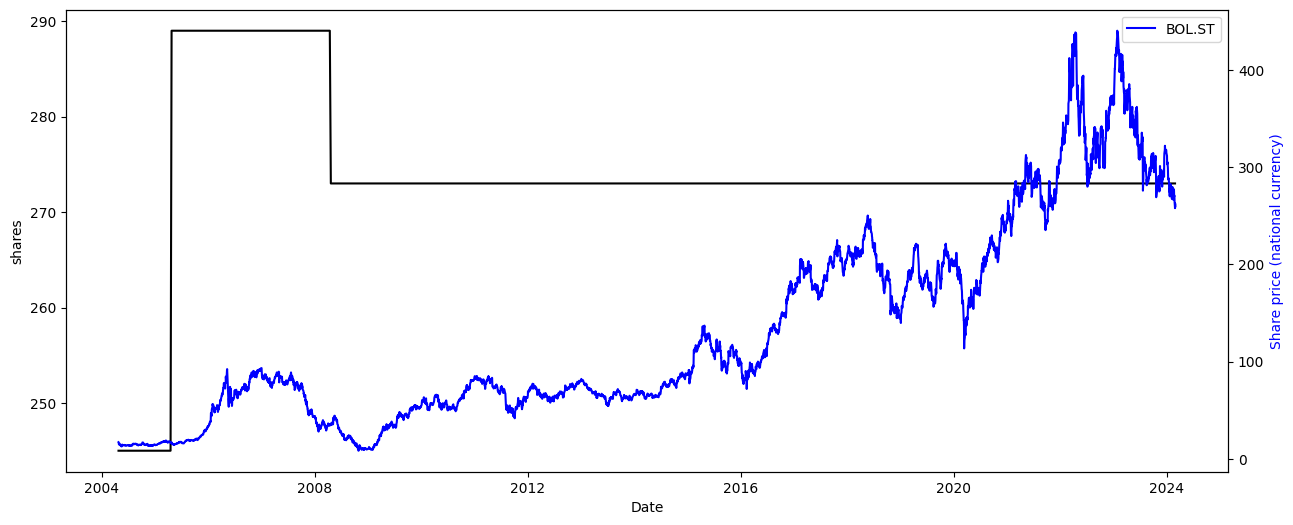

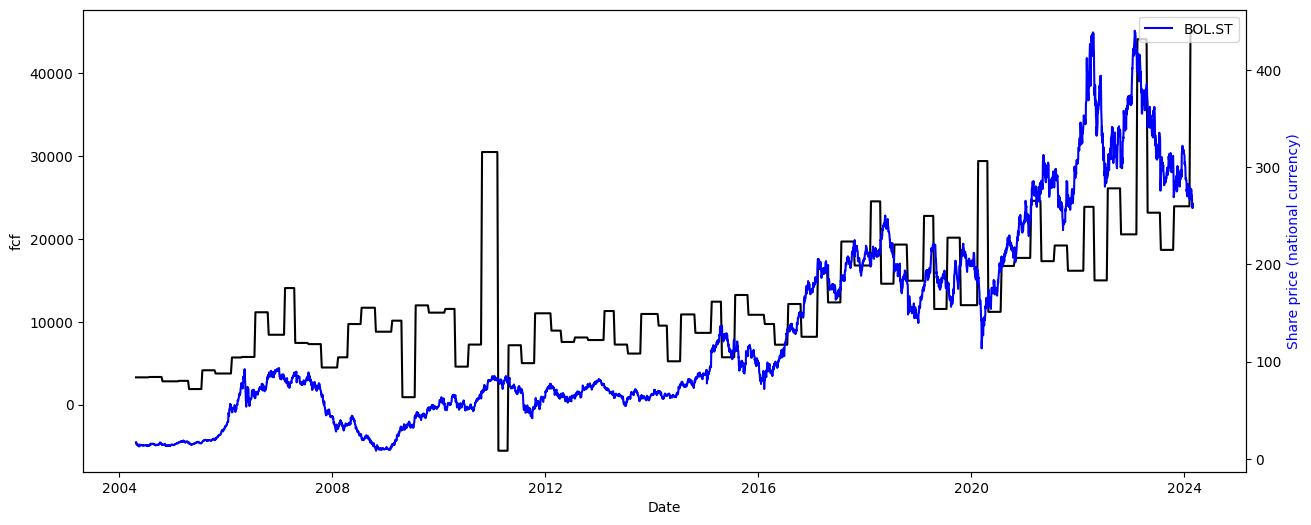

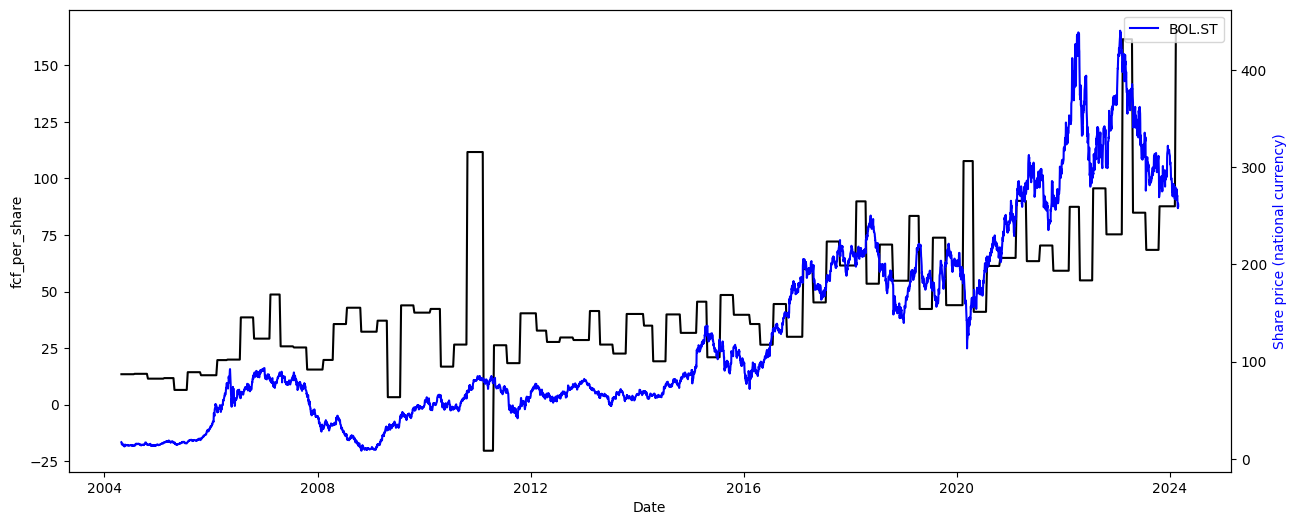

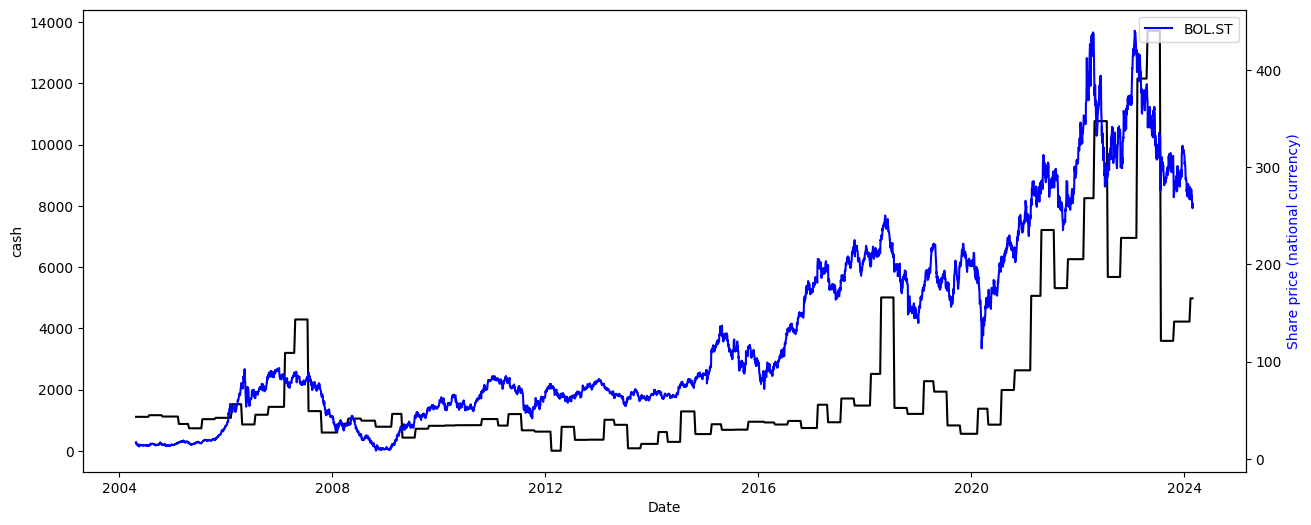

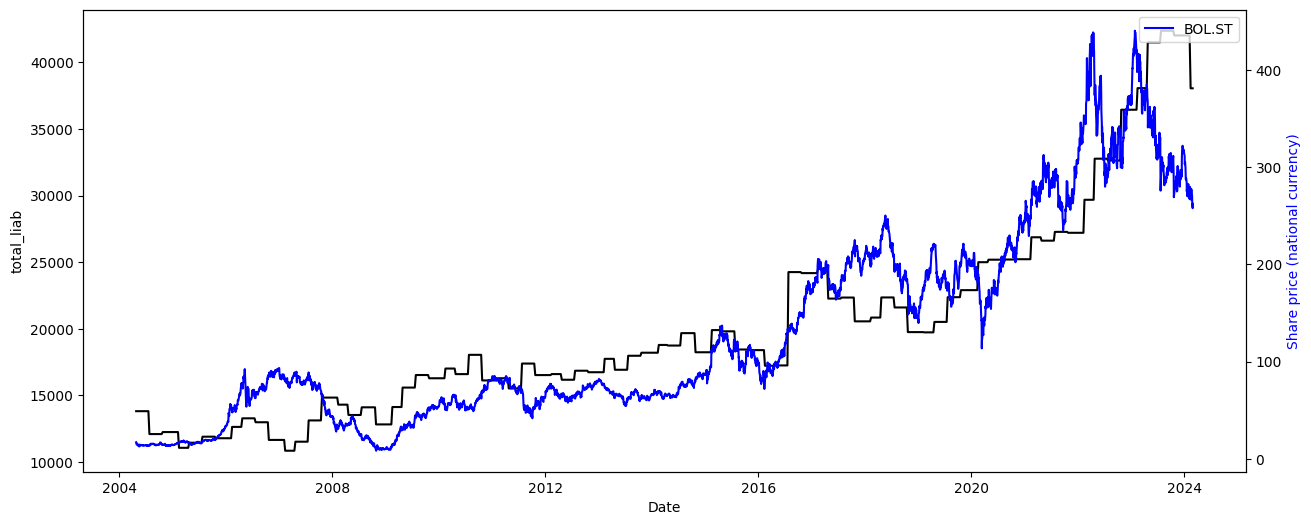

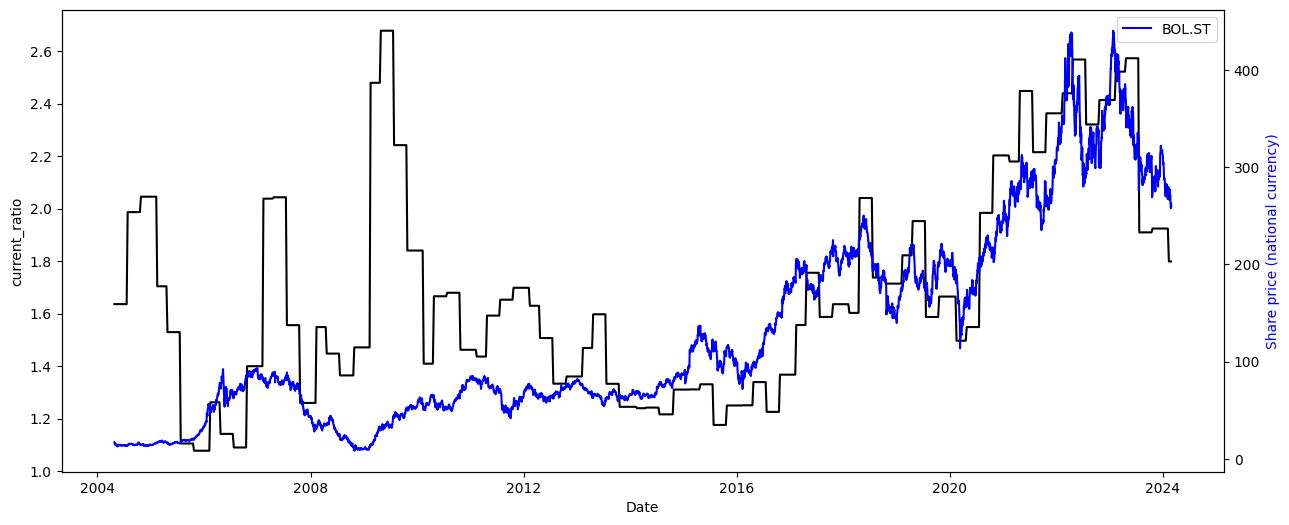

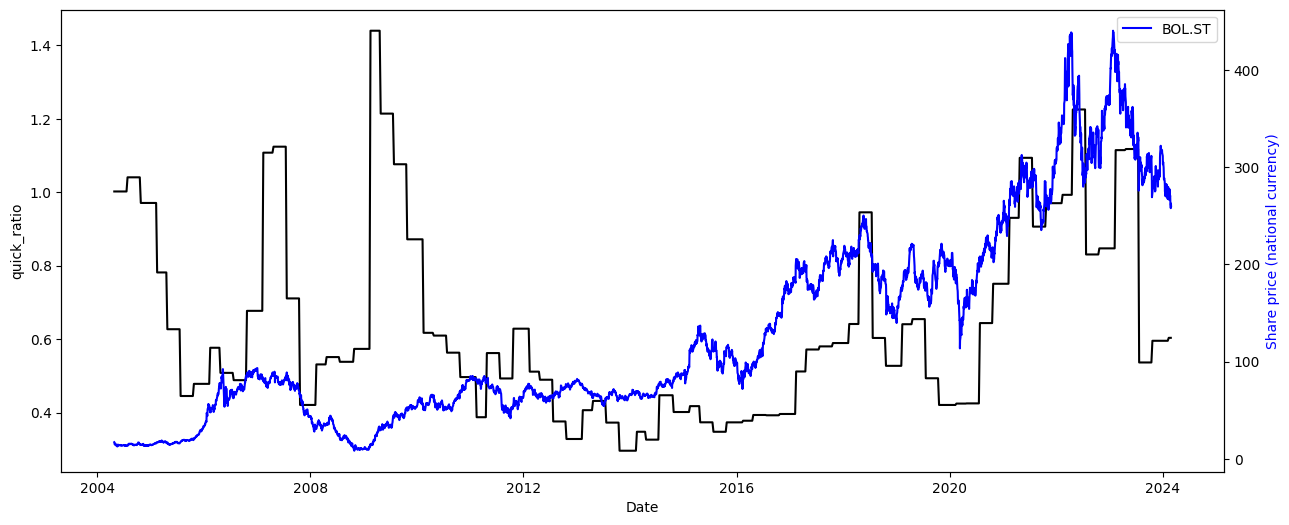

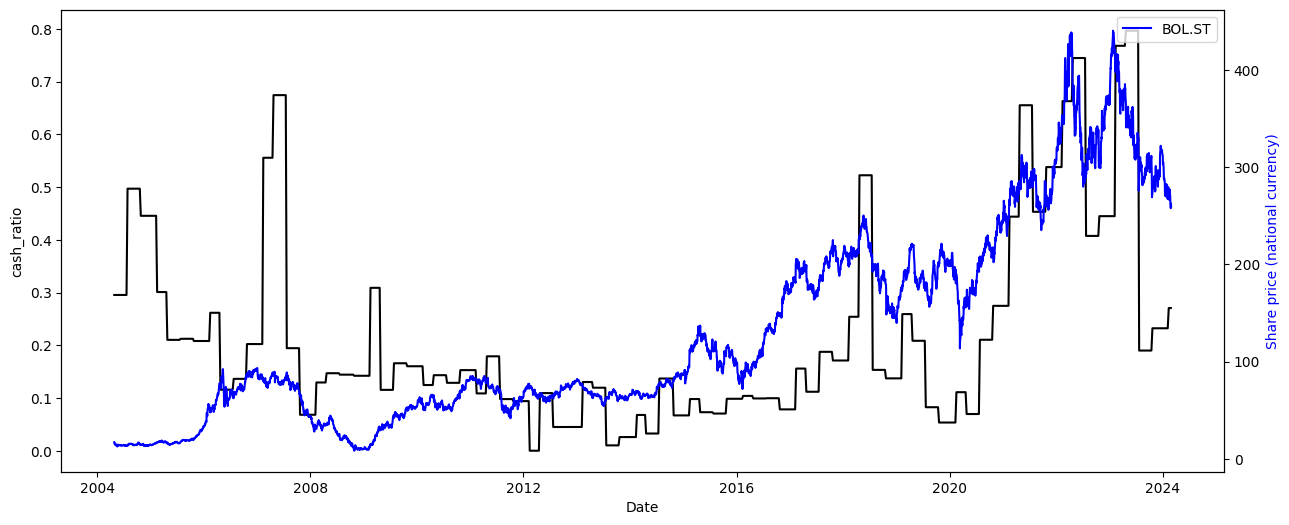

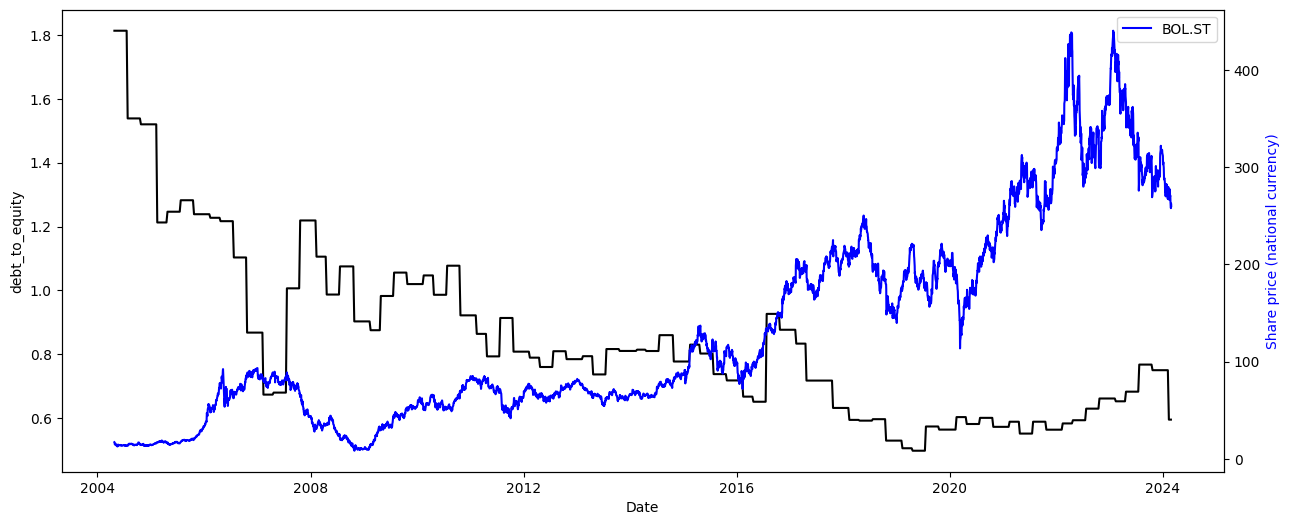

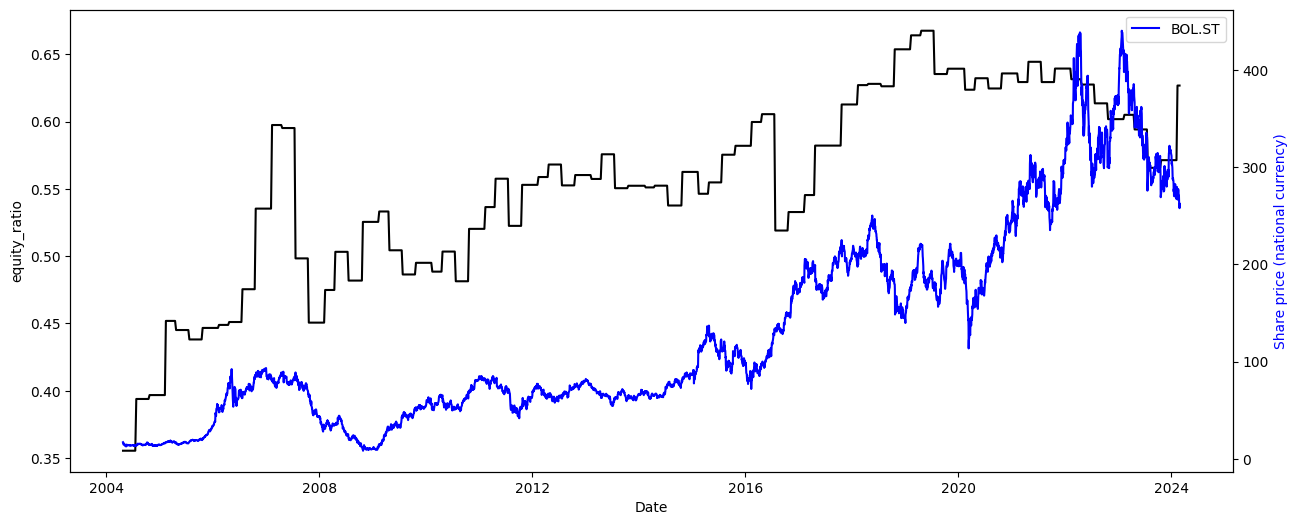

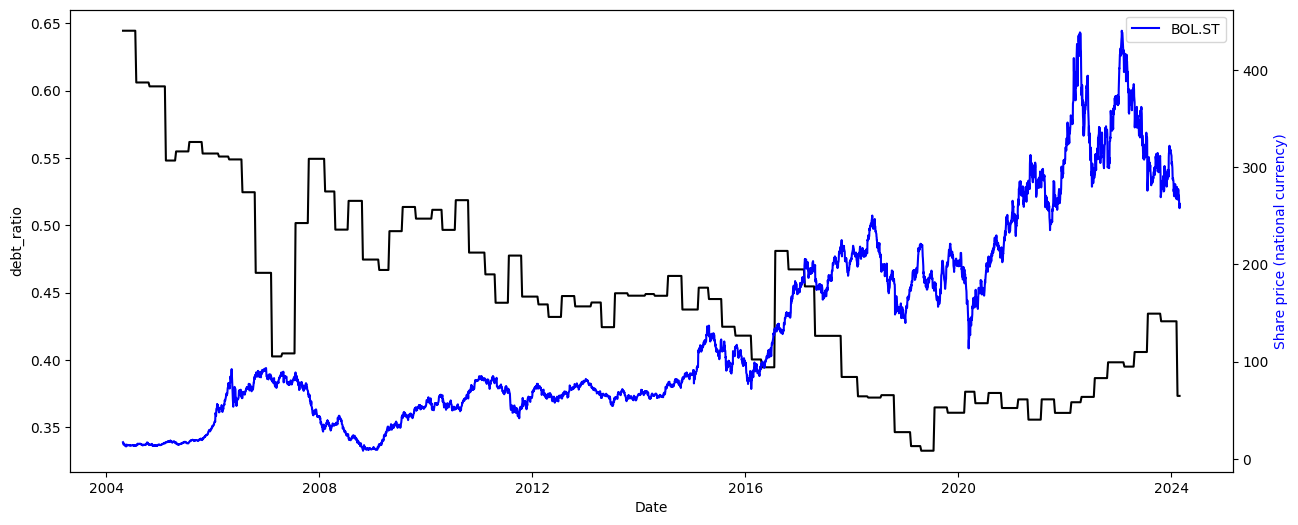

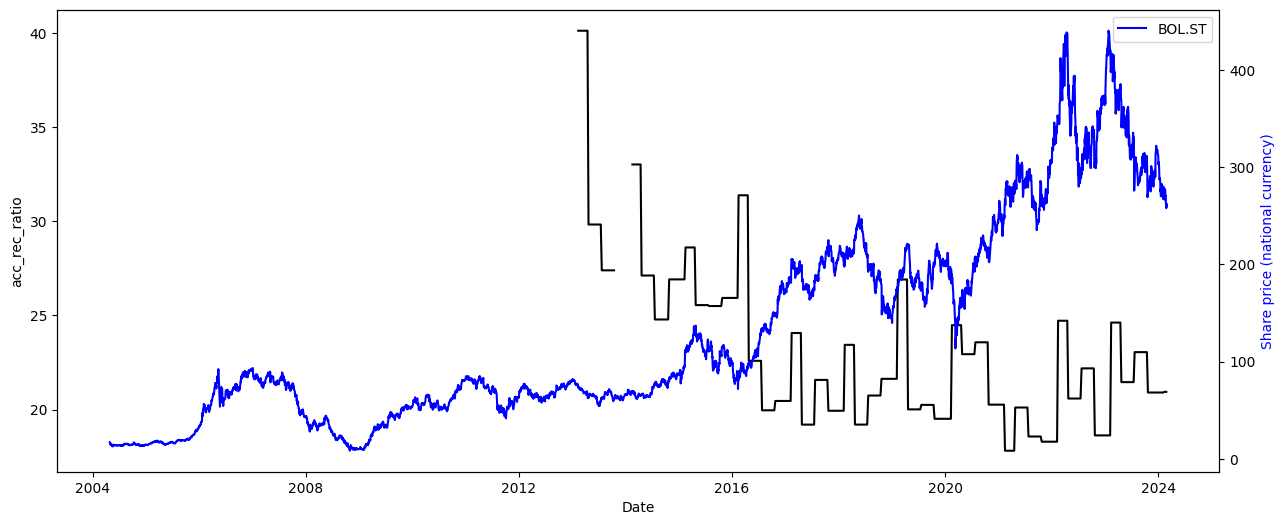

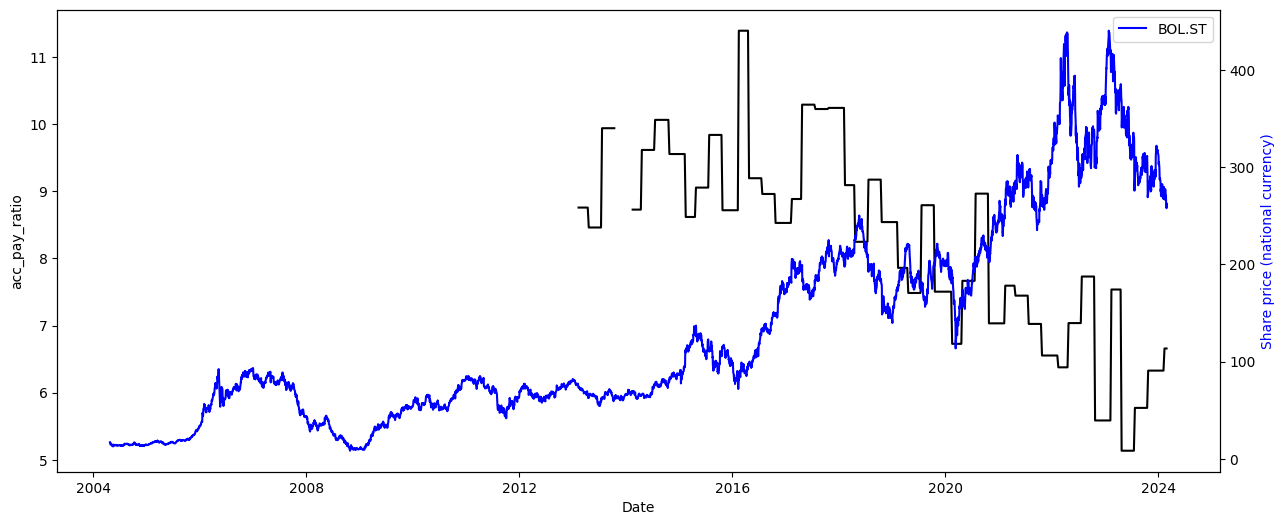

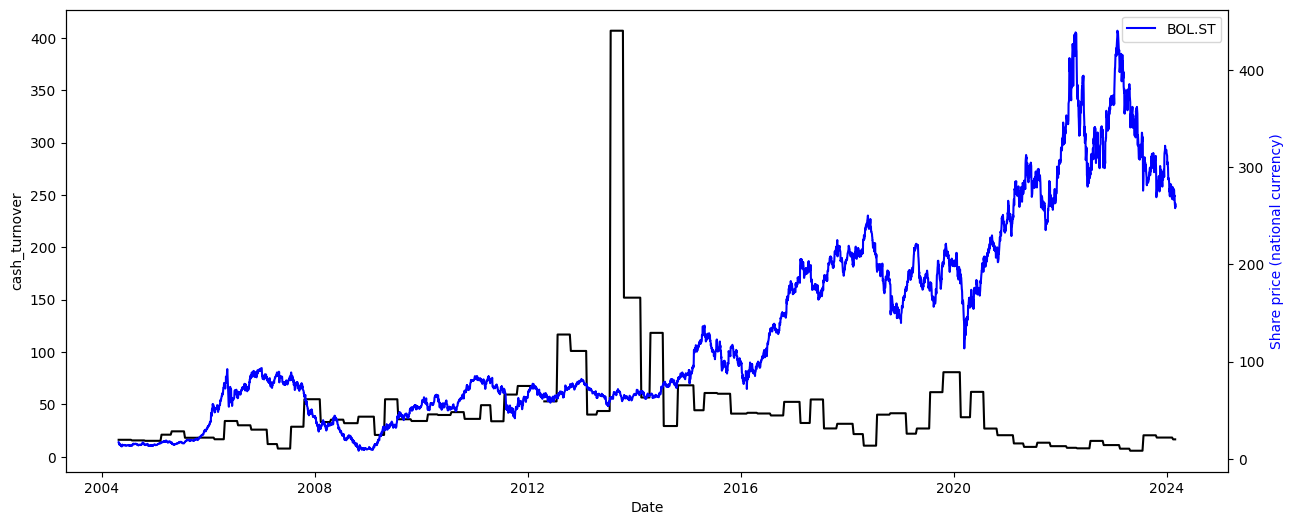

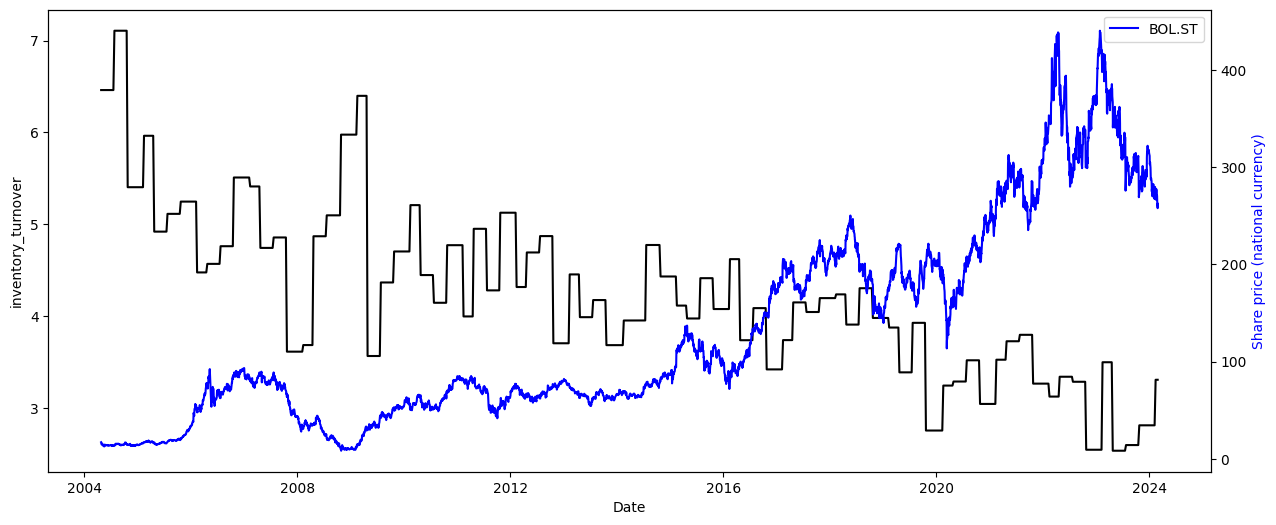

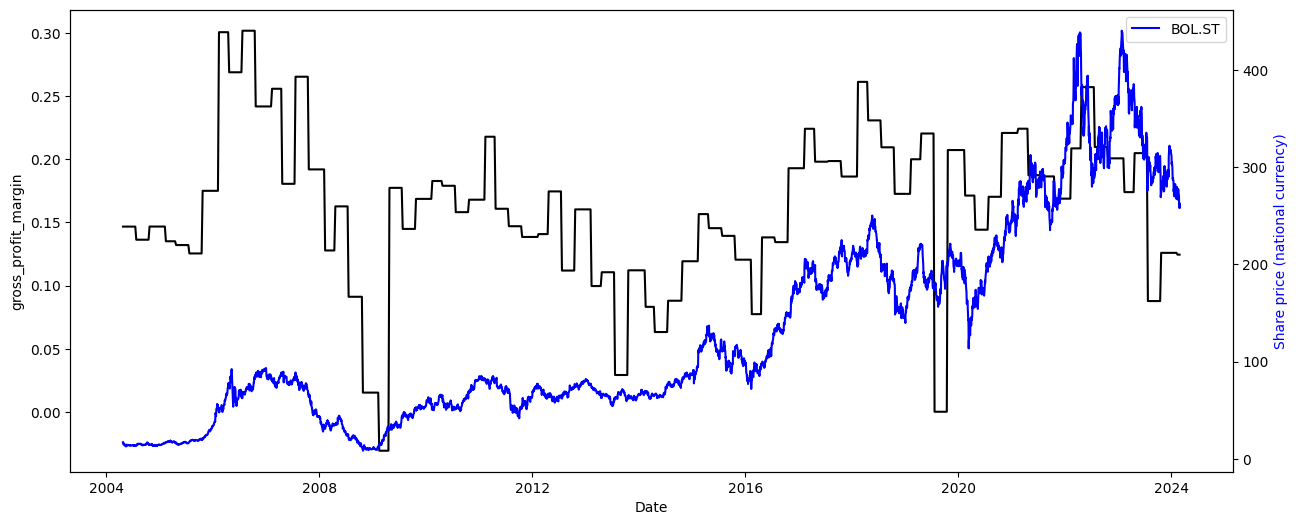

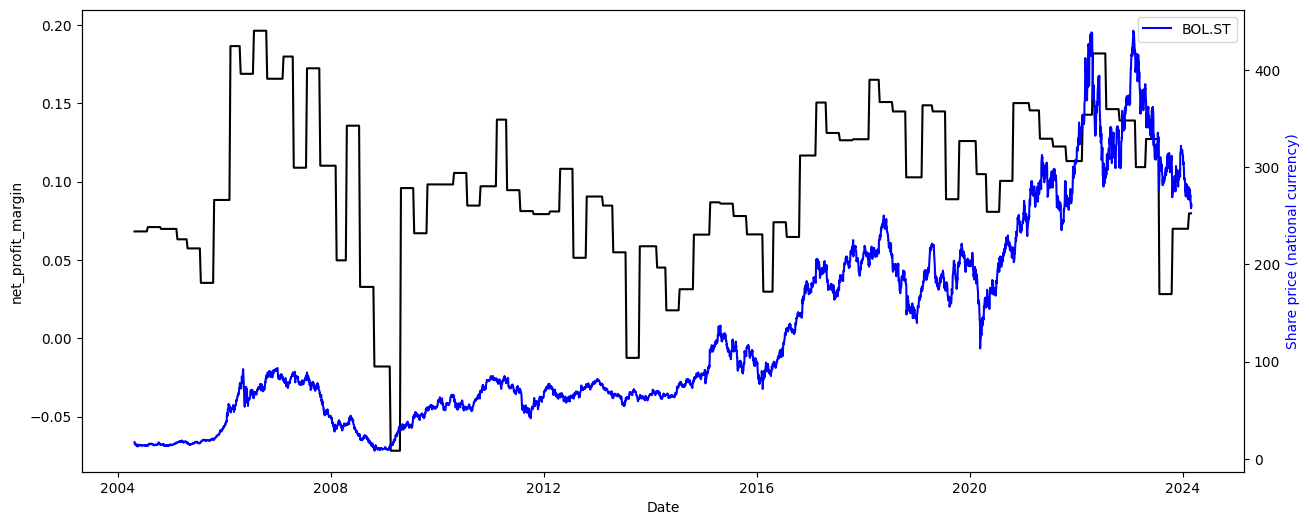

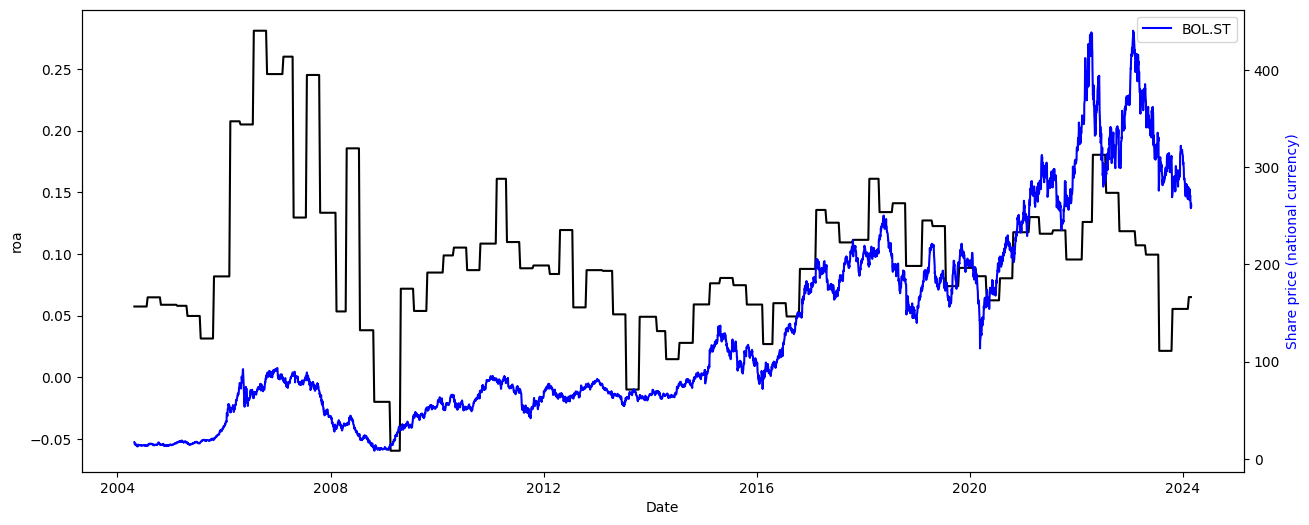

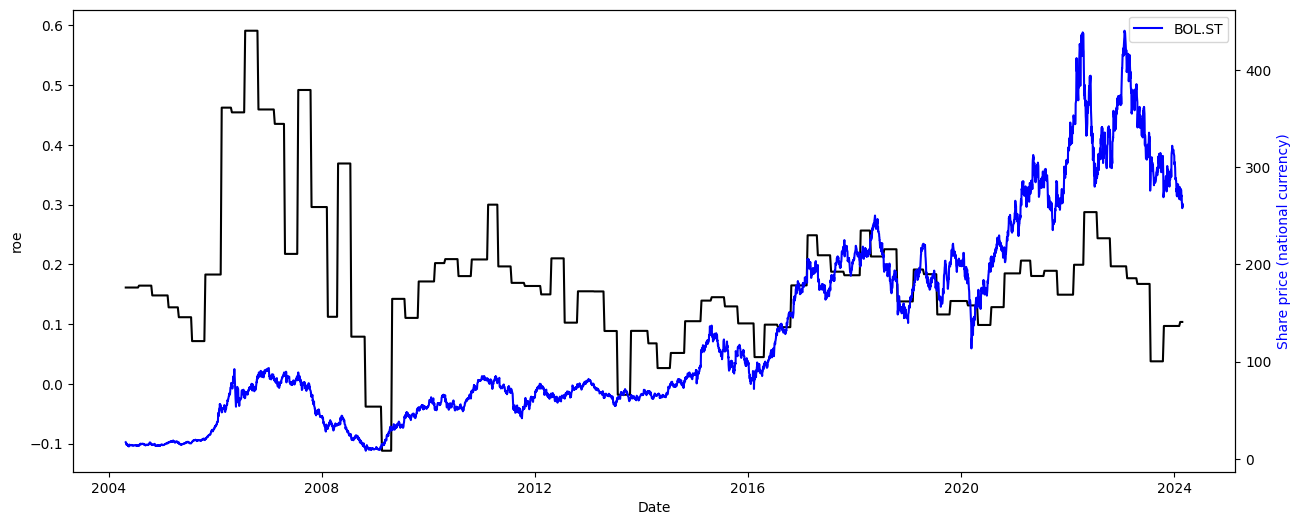

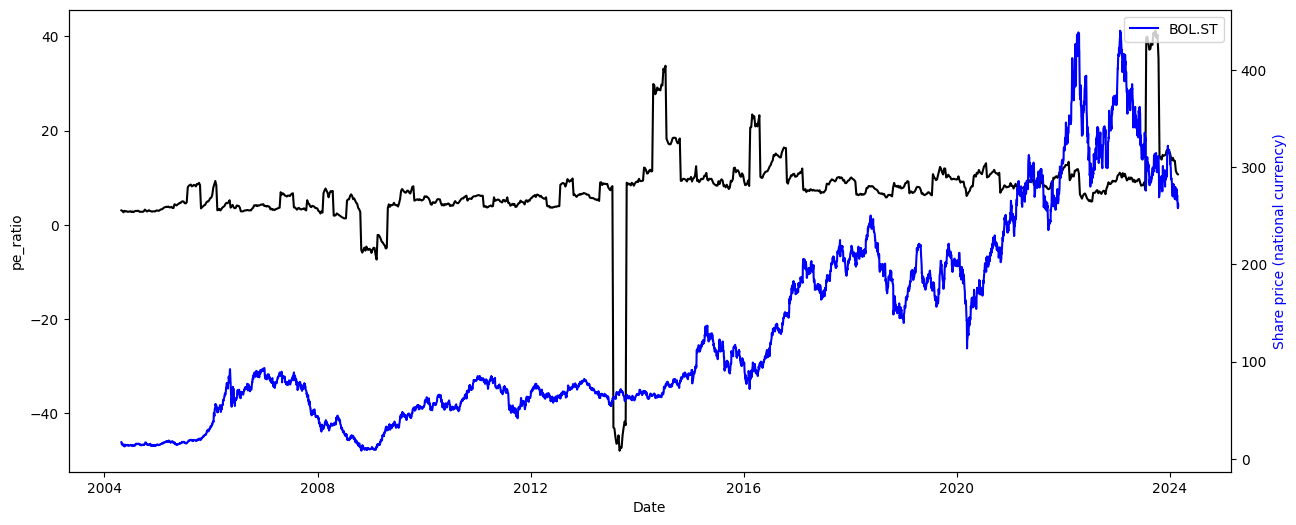

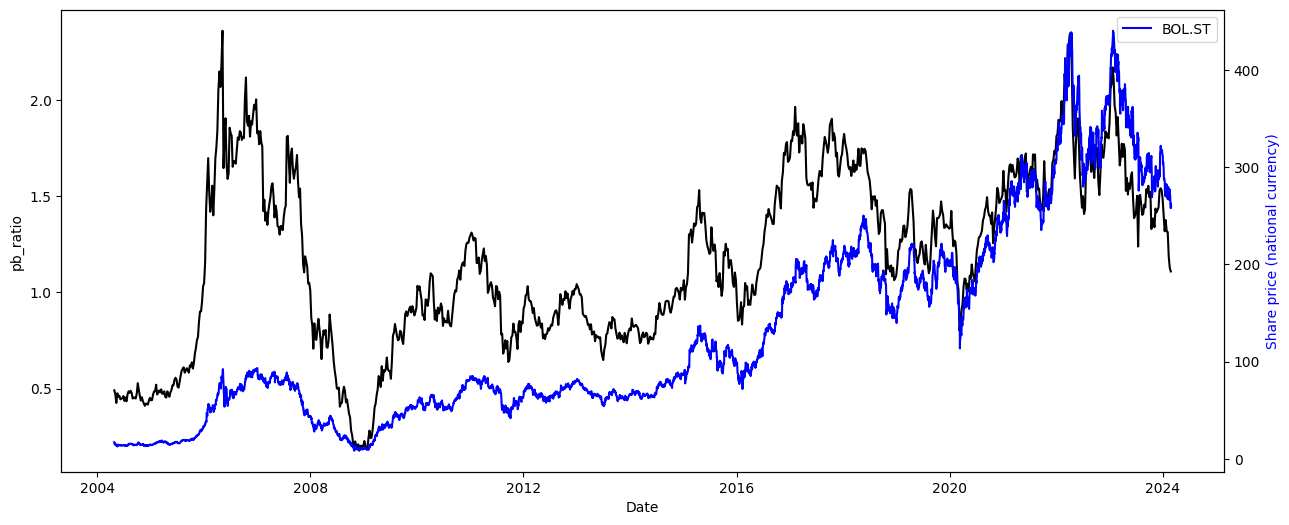

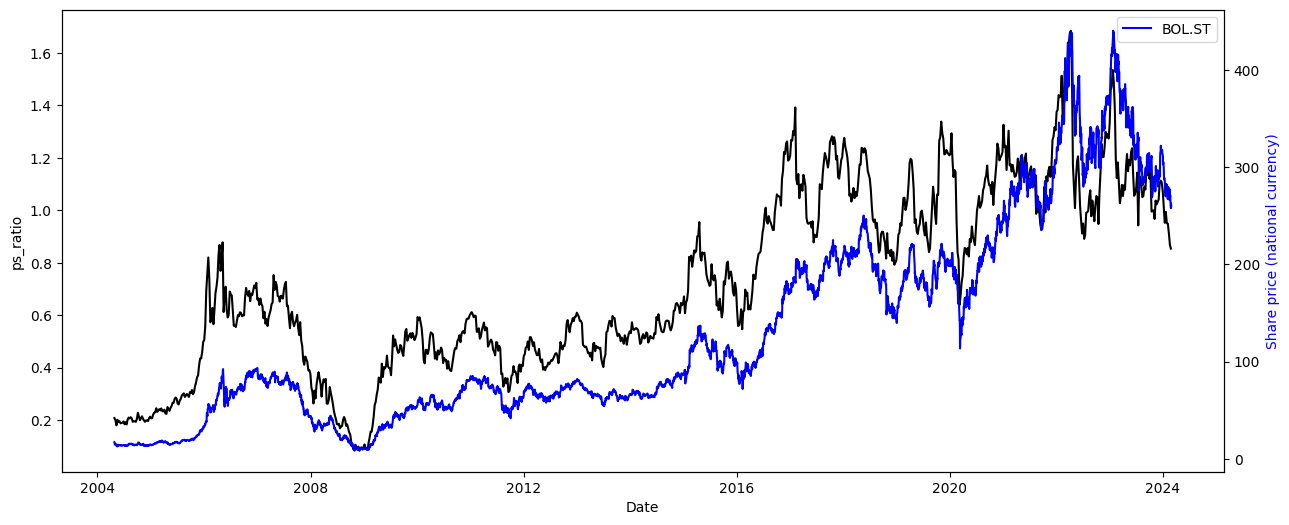

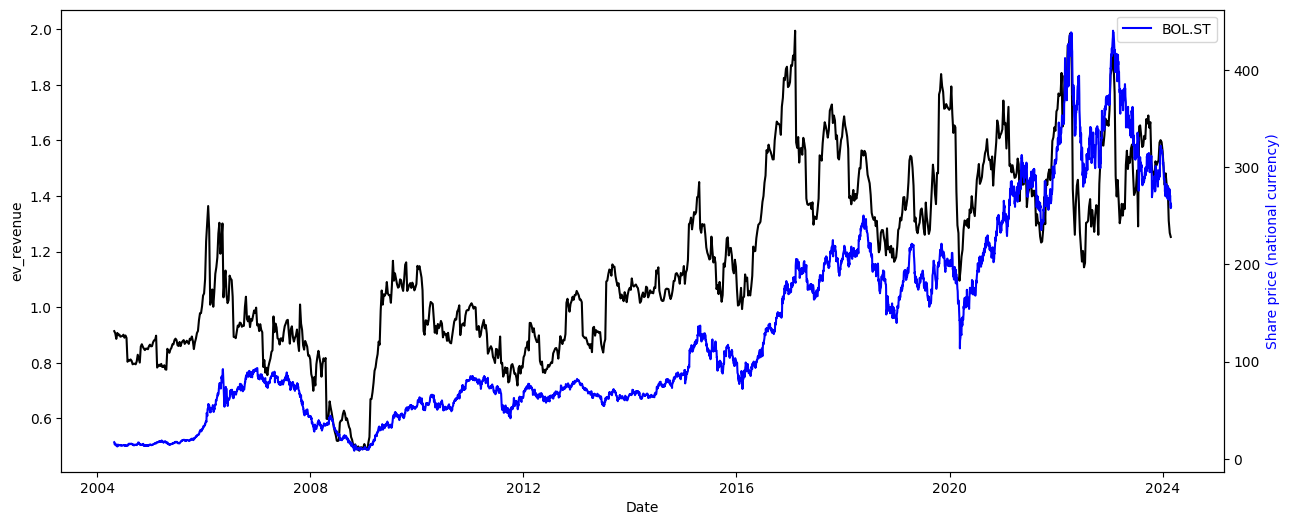

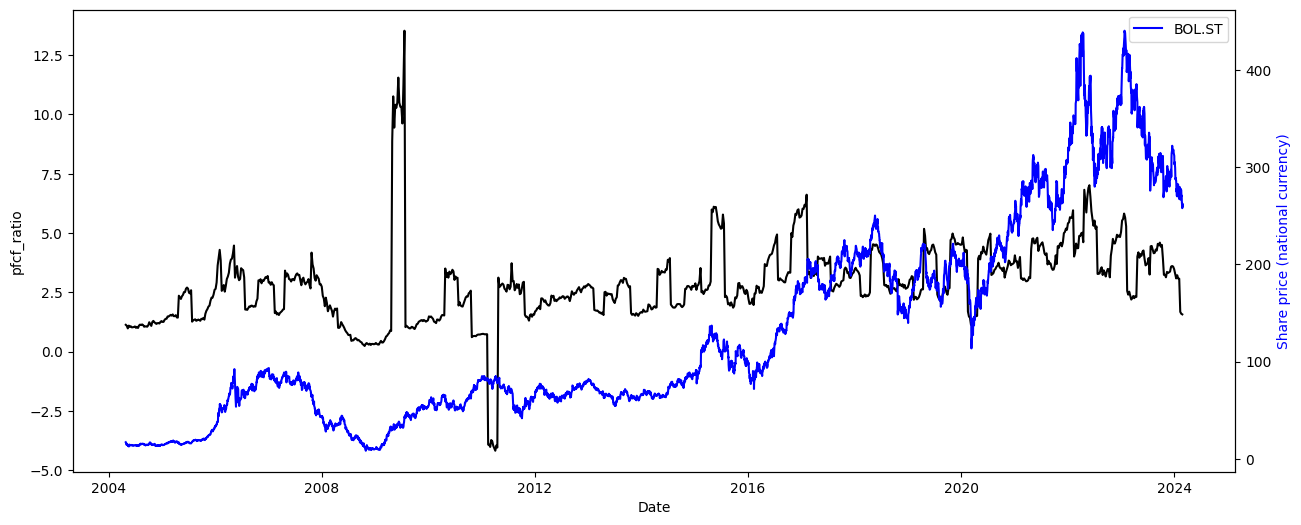

In [17]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

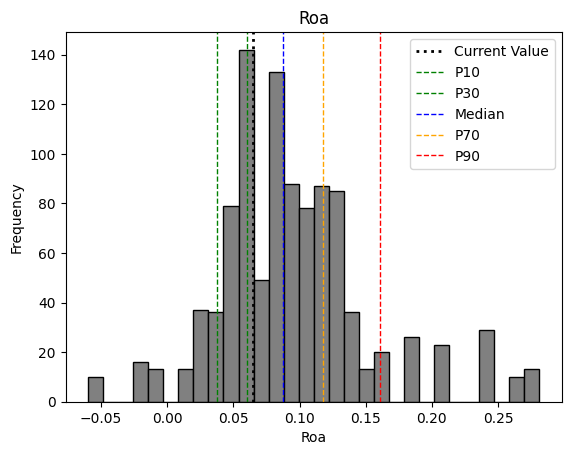

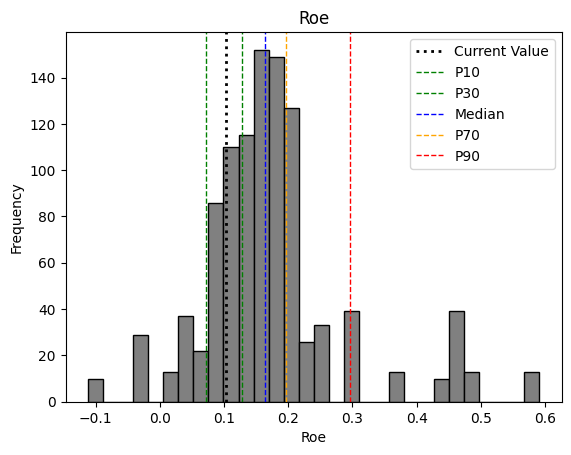

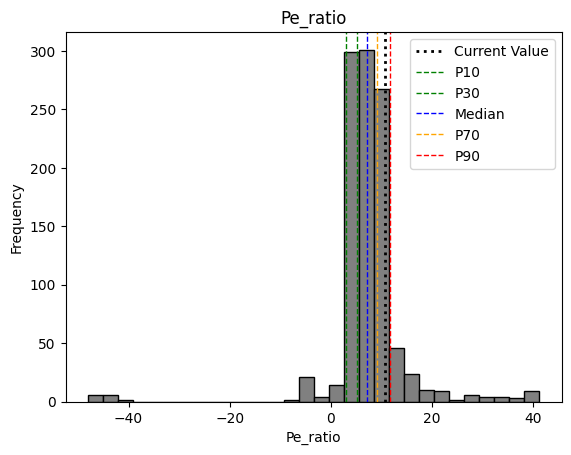

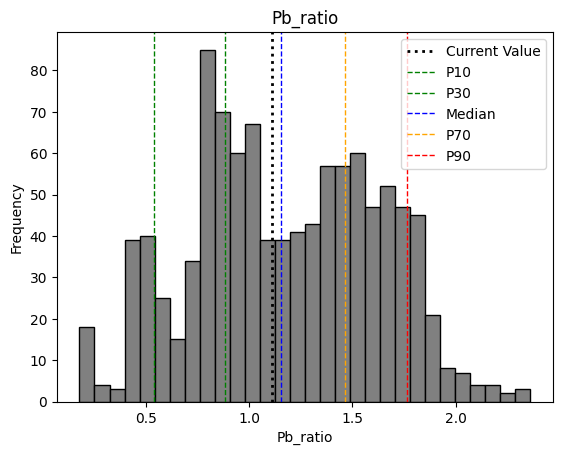

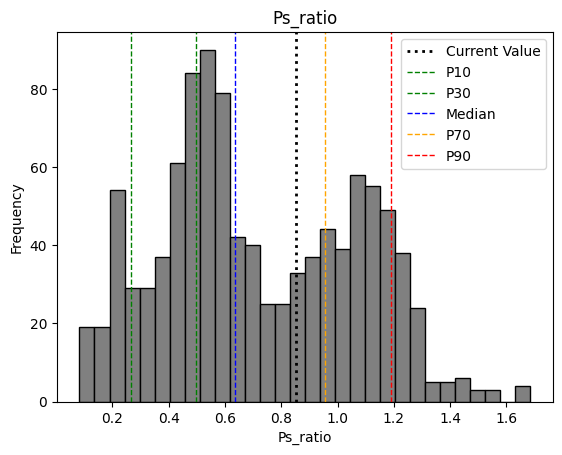

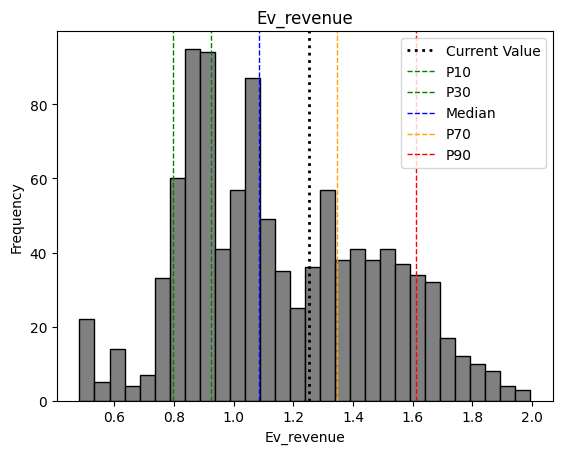

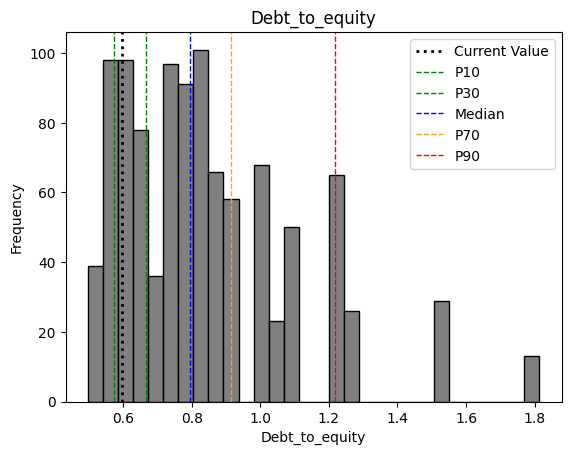

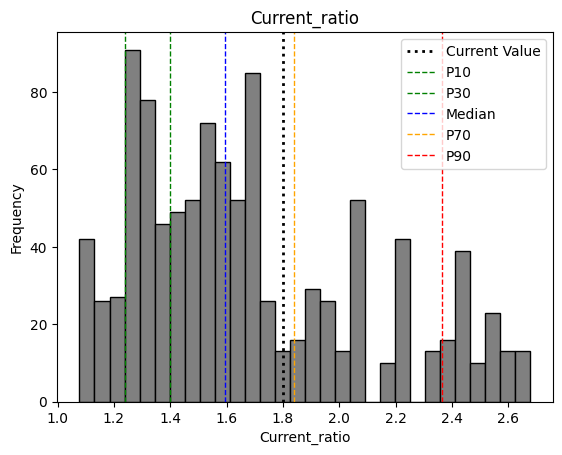

In [18]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[])

## Calculate correlation between value parameters

In [19]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.972414,-0.054187,0.622760,0.255229,0.077137,-0.088157,0.080843
roe,0.972414,1.000000,-0.093953,0.521143,0.100870,-0.043631,0.120932,-0.030443
pe_ratio,-0.054187,-0.093953,1.000000,0.240978,0.336869,0.360300,-0.218956,0.033018
pb_ratio,0.622760,0.521143,0.240978,1.000000,0.856173,0.746851,-0.495769,0.243909
ps_ratio,0.255229,0.100870,0.336869,0.856173,1.000000,0.954176,-0.699212,0.401622
ev_revenue,0.077137,-0.043631,0.360300,0.746851,0.954176,1.000000,-0.554067,0.343463
debt_to_equity,-0.088157,0.120932,-0.218956,-0.495769,-0.699212,-0.554067,1.000000,-0.300406
current_ratio,0.080843,-0.030443,0.033018,0.243909,0.401622,0.343463,-0.300406,1.000000


29 timestemos have been found!


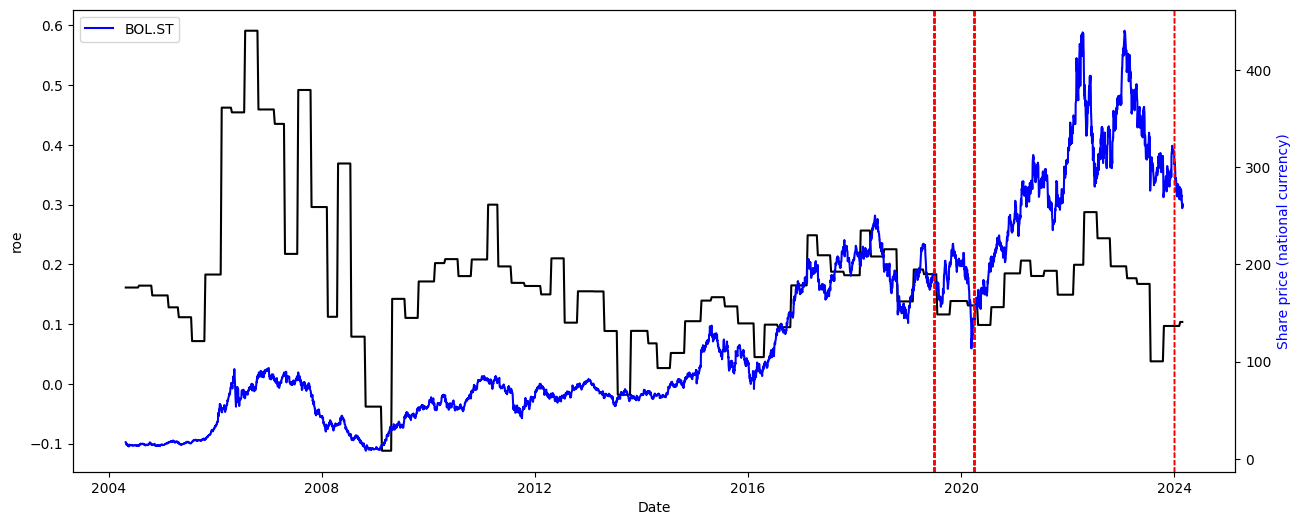

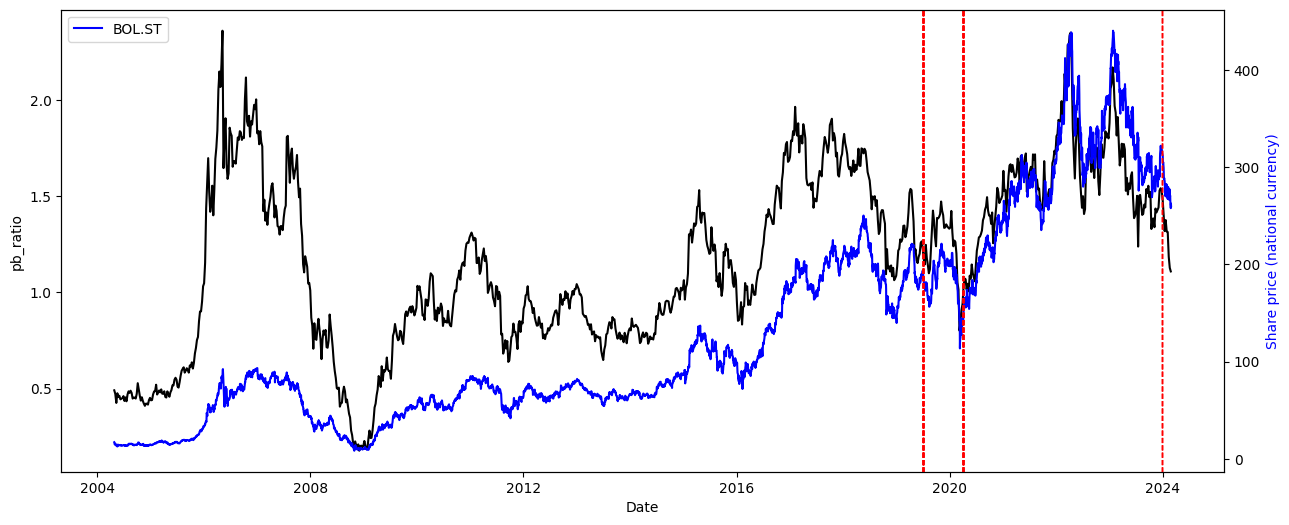

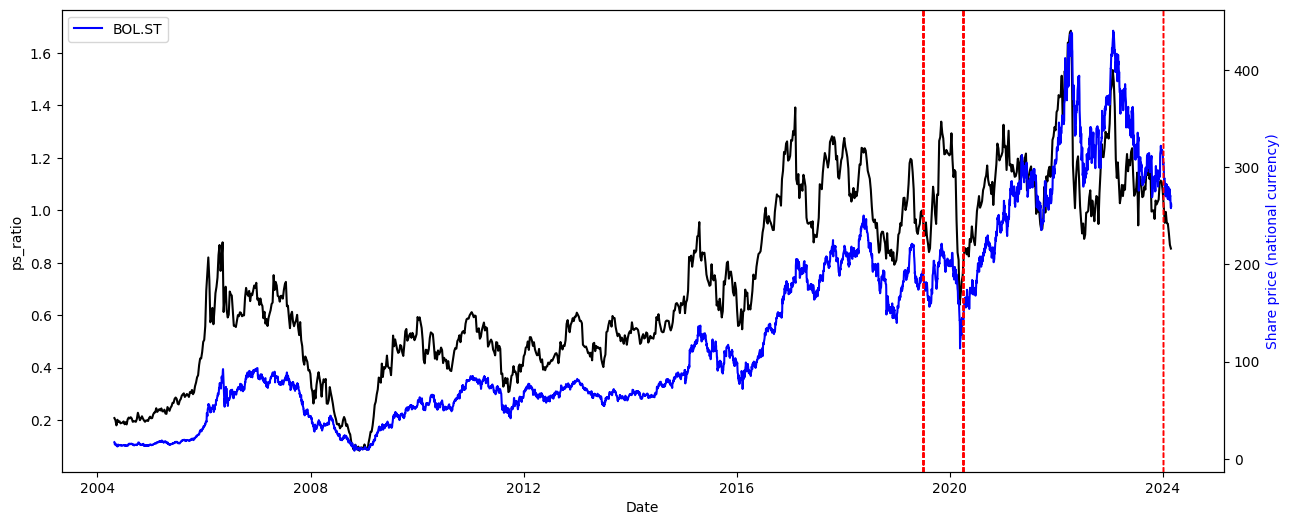

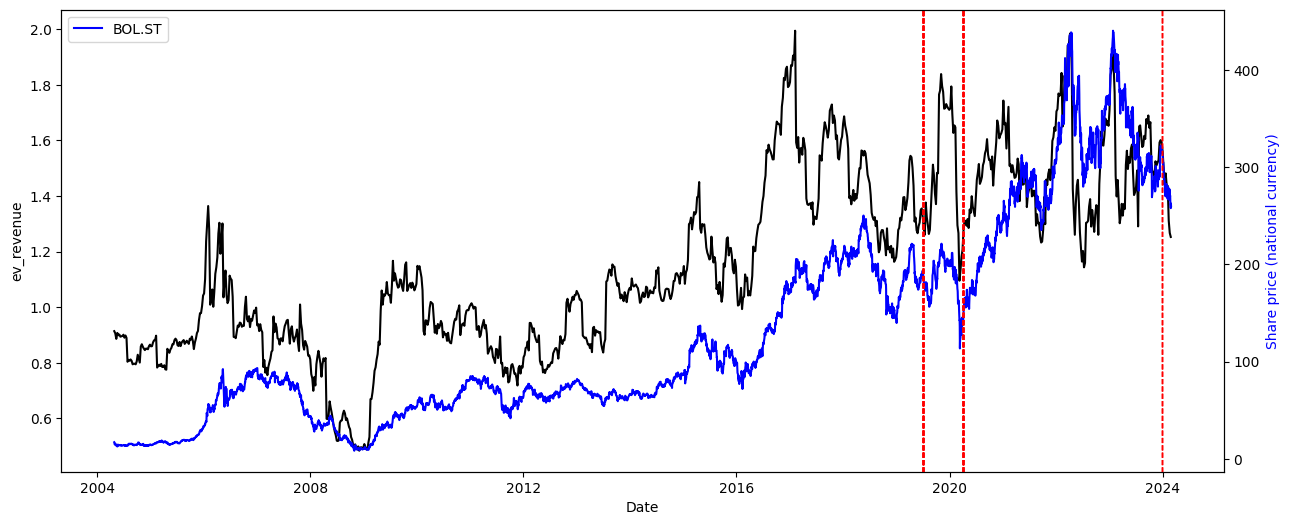

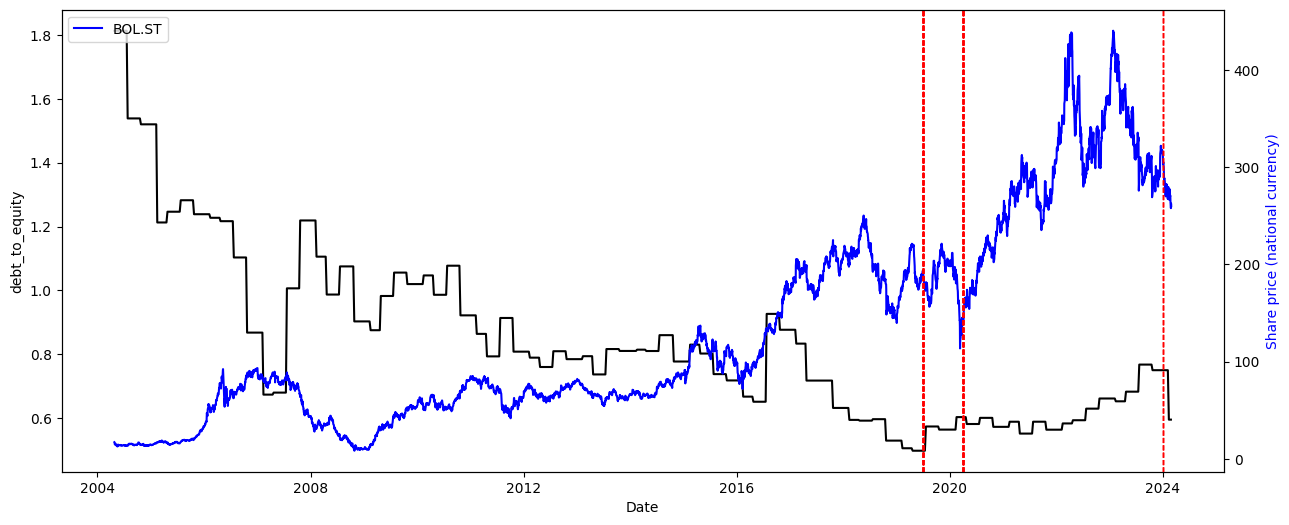

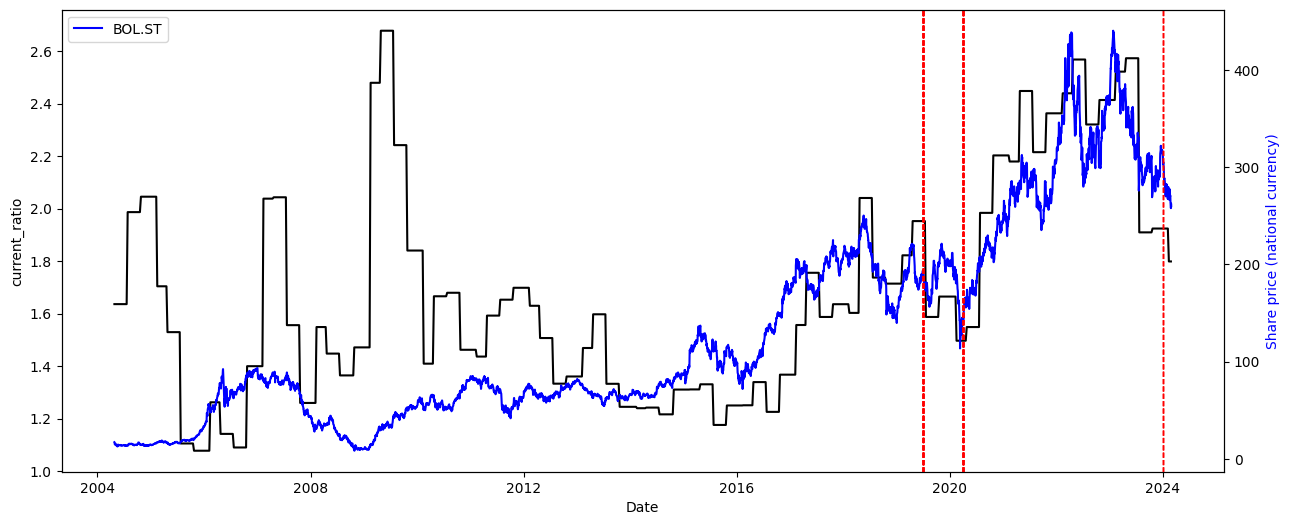

In [20]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2
    )